In [65]:
import pandas as pd
import mysql.connector

In [66]:
fecha_ini='2018-09-01 00:00:00'
fecha_fin='2018-09-30 21:00:00'

In [67]:
db = mysql.connector.connect(
  host='172.18.55.6',
  user='comandato',
  passwd='comandato123',
)

In [68]:
consulta="SELECT * FROM cnt.gestion  where fecha_gestion between '{0}' and '{1}' ".format(fecha_ini,fecha_fin)

In [69]:
bd_cnt=pd.read_sql(consulta, con=db)

##         REPORTE TOTAL

In [70]:
bd_cnt['mes']=pd.DatetimeIndex(bd_cnt['fecha_gestion']).month
bd_cnt['dia']=pd.DatetimeIndex(bd_cnt['fecha_gestion']).day
bd_cnt['hora']=pd.DatetimeIndex(bd_cnt['fecha_gestion']).hour

In [71]:
bd_cnt.head()

,idgestion,cedula_cliente,agente,fecha_gestion,respuesta_obtenida,contacto_gestiono,numero_gestion,tiempo_gestion,archivo_audio,obervaciones,mes,dia,hora
0,102,0000920490240,5102,2018-09-11 15:59:47,NO CONTACTO,BUZON DE VOZ,0988912286,0,,,9,11,15
1,103,0000926025578,,2018-09-11 16:00:12,NO CONTACTO,NO CONTESTA,,0,,,9,11,16
2,104,0000926904525,,2018-09-11 16:03:06,EQUIVOCADO,EQUIVOCADO,0998054180,21,,NO ES EL TITULAR,9,11,16
3,105,0000913908539,,2018-09-11 16:04:30,NO CONTACTO,BUZON DE VOZ,0981648686,22,,,9,11,16
4,106,0000918649153,,2018-09-11 16:04:30,NO CONTACTO,NO CONTESTA,,22,,,9,11,16


In [76]:
base_filtrado=bd_cnt[(bd_cnt['fecha_gestion']>'2018-09-27 00:00:00') & (bd_cnt['fecha_gestion'] < '2018-09-27 23:00:00')]

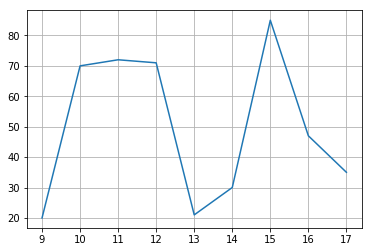

In [77]:
base_filtrado['hora'].value_counts().sort_index(axis=0, ascending=True).plot(kind='line',grid=True)